In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
selected_features = df.loc[df["koi_disposition"] != "CANDIDATE", ["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_period", "koi_time0bk", "koi_impact", "koi_duration", "koi_depth", "koi_prad", "koi_teq" ,"koi_insol", "koi_model_snr", "koi_tce_plnt_num", "koi_steff", "koi_slogg", "koi_srad", "ra", "dec", "koi_kepmag"]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
y = df.loc[df["koi_disposition"] != "CANDIDATE", "koi_disposition"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=42)

In [6]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
979,0,1,1,1,41.077297,379.128480,0.030,5.52500,1216.8,3.25,523,17.74,28.8,1,5665,4.381,0.938,289.07703,51.761822,14.907
6201,0,1,0,0,13.639480,144.531439,1.033,3.12422,81103.0,44.00,680,50.51,664.1,1,5461,4.517,0.846,292.21732,49.707901,15.852
5648,0,1,0,0,14.854416,136.559783,0.570,5.13753,77410.0,29.77,798,95.83,2822.1,1,6214,4.444,1.022,282.42578,43.884331,14.558
229,0,0,0,0,10.681695,131.550820,0.646,3.60500,307.8,2.30,897,152.75,21.9,4,5553,4.221,1.250,292.58044,46.097389,15.065
1302,0,0,0,0,12.509458,136.992170,0.626,3.47900,155.3,1.54,875,138.54,16.0,2,5949,4.303,1.184,295.42200,38.735691,13.860


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

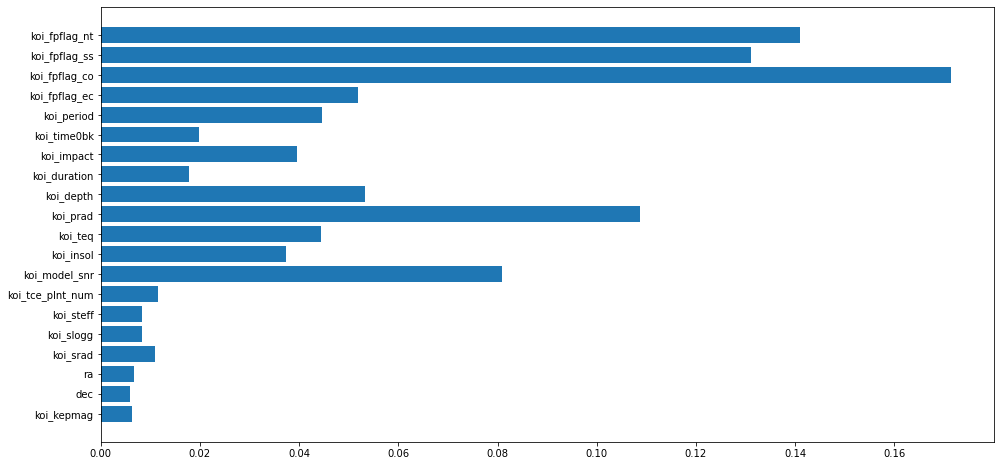

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.barh(X_train.columns, model3.feature_importances_)
plt.xlim(0, max(model3.feature_importances_)*1.05)
plt.gca().invert_yaxis()
plt.show()

# Train the Model



In [10]:
print(f"Training Data Score: {model3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model3.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9834087481146304


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [11]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid3 = GridSearchCV(model3, param_grid, cv=5, verbose=3)

In [12]:
# Train the model with GridSearch
grid3.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.982, total=   0.6s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.980, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.984, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.989, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, score=0.979, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.984, total=   1.9s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.981, total=   1.7s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=500, score=0.986, total=   1.7s
[CV] criterion=gini, max_depth=4, max_features=auto

[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=200, score=0.981, total=   0.8s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=200, score=0.986, total=   0.8s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=200, score=0.994, total=   0.7s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=200, score=0.985, total=   0.8s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=500, score=0.984, total=   1.9s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=500, score=0.980, total=   1.8s
[CV] criterion=gini, max_depth=5, max_features=log2

[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.989, total=   0.8s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.984, total=   0.8s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.985, total=   0.8s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.995, total=   0.9s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, score=0.989, total=   0.8s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, score=0.987, total=   2.2s
[CV] criterion=gini, max_depth=7, max_features=sqrt

[CV]  criterion=gini, max_depth=8, max_features=log2, n_estimators=500, score=0.989, total=   2.3s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=200, score=0.985, total=   0.8s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=200, score=0.982, total=   0.8s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=200, score=0.986, total=   0.8s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=200, score=0.994, total=   0.9s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=200, score=0.984, total=   0.8s
[CV] criterion=entrop

[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.984, total=   2.5s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.987, total=   2.4s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.994, total=   2.3s
[CV] criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, score=0.989, total=   2.2s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=200, score=0.986, total=   0.9s
[CV] criterion=entropy, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, max_features=log2, n_estimators=200, score=0.984, total=   0.9s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=200, score=0.996, total=   1.1s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=200, score=0.989, total=   1.1s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=500, score=0.987, total=   2.7s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=500, score=0.986, total=   2.8s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=500, score=0.990, total=   2.6s
[CV] criterion=entropy, max_depth=7, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=7, max_features=auto, n_estimators=500, score=0.995, total=   2.7s
[CV] criterion=ent

[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.990, total=   1.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.986, total=   1.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.990, total=   1.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.995, total=   1.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=200, score=0.990, total=   1.1s
[CV] criterion=entropy, max_depth=8, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=log2, n_estimators=500, score=0.990, total=   2.8s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  7.9min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=3)

In [13]:
print(grid3.best_params_)
print(grid3.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
0.9904487848045257


In [14]:
predictions = grid3.predict(X_test_scaled)

In [15]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CONFIRMED", "FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CONFIRMED       1.00      0.95      0.98       451
FALSE POSITIVE       0.98      1.00      0.99       875

      accuracy                           0.98      1326
     macro avg       0.99      0.98      0.98      1326
  weighted avg       0.98      0.98      0.98      1326



In [16]:
candidates = df.loc[df["koi_disposition"] == "CANDIDATE", ["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_period", "koi_time0bk", "koi_impact", "koi_duration", "koi_depth", "koi_prad", "koi_teq" ,"koi_insol", "koi_model_snr", "koi_tce_plnt_num", "koi_steff", "koi_slogg", "koi_srad", "ra", "dec", "koi_kepmag"]]
scaled_candidates = scaler.transform(candidates)
candidates["koi_disposition"] = grid3.predict(scaled_candidates)
candidates.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,koi_disposition
29,0,0,0,0,4.959319,172.258529,0.831,2.22739,9802.0,12.21,...,349.40,696.5,1,5712,4.359,1.082,292.16705,48.727589,15.263,CONFIRMED
47,0,0,0,0,40.419504,173.564690,0.911,3.36200,6256.0,7.51,...,11.29,36.9,1,5446,4.507,0.781,294.31686,50.080231,15.487,CONFIRMED
50,0,0,0,0,7.240661,137.755450,1.198,0.55800,556.4,19.45,...,68.63,13.7,2,5005,4.595,0.765,293.83331,50.230350,15.334,FALSE POSITIVE
51,0,0,0,0,3.435916,132.662400,0.624,3.13300,23.2,0.55,...,617.61,8.7,3,5779,4.339,1.087,287.88733,46.276241,12.791,CONFIRMED
59,0,0,0,0,1.626630,169.820171,1.260,2.11450,1620.6,32.43,...,1355.88,103.6,1,5735,4.410,0.973,294.36819,38.310280,15.279,FALSE POSITIVE
